# Exploring Dandiset 001174: Calcium imaging in SMA and M1 of macaques

**Disclaimer:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This notebook helps explore Dandiset [001174 (version 0.250331.2218)](https://dandiarchive.org/dandiset/001174/0.250331.2218).

**Dandiset Name:** Calcium imaging in SMA and M1 of macaques

**Description:** The study of motor cortices in non-human primates is relevant to our understanding of human motor control, both in healthy conditions and in movement disorders. Calcium imaging and miniature microscopes allow the study of multiple genetically identified neurons with excellent spatial resolution. We used this method to examine activity patterns of projection neurons in deep layers of the supplementary motor (SMA) and primary motor areas (M1) in four rhesus macaques. We implanted gradient index lenses and expressed GCaMP6f to image calcium transients while the animals were at rest or engaged in an arm reaching task. We tracked the activity of SMA and M1 neurons across conditions, examined cell pairs for synchronous activity, and assessed whether SMA and M1 neuronal activation followed specific sequential activation patterns. We demonstrate the value of in vivo calcium imaging for studying patterns of activity in groups of corticofugal neurons in SMA and M1.

## What this notebook covers

This notebook will guide you through the following steps:
1. Listing required Python packages.
2. Connecting to the DANDI archive and loading metadata for Dandiset 001174.
3. Listing some assets (files) within the Dandiset.
4. Loading a specific NWB (Neurodata Without Borders) file from the Dandiset.
5. Exploring the metadata and contents of the loaded NWB file.
6. Visualizing some of the data, such as raw imaging frames, ROI fluorescence traces, and ROI image masks.
7. Summarizing the findings and suggesting potential future directions for analysis.

## Required Packages

To run this notebook, you will need the following Python packages installed:
- `dandi` (for interacting with the DANDI Archive)
- `pynwb` (for reading NWB files)
- `h5py` (dependency for pynwb, for HDF5 file access)
- `remfile` (for accessing remote HDF5 files)
- `numpy` (for numerical operations)
- `matplotlib` (for plotting)
- `seaborn` (for enhanced plotting styles)

It is assumed that these packages are already installed on your system.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dandiset Information using DANDI API

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001174"
dandiset_version = "0.250331.2218"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
# The URL is constructed based on the Dandiset ID and version
print(f"Dandiset URL: https://dandiarchive.org/dandiset/{dandiset_id}/{dandiset_version}")
print(f"Dandiset description: {metadata.get('description', 'No description available.')}")


# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Calcium imaging in SMA and M1 of macaques
Dandiset URL: https://dandiarchive.org/dandiset/001174/0.250331.2218
Dandiset description: The study of motor cortices in non-human primates is relevant to our understanding of human motor control, both in healthy conditions and in movement disorders. Calcium imaging and miniature microscopes allow the study of multiple genetically identified neurons with excellent spatial resolution. We used this method to examine activity patterns of projection neurons in deep layers of the supplementary motor (SMA) and primary motor areas (M1) in four rhesus macaques. We implanted gradient index lenses and expressed GCaMP6f to image calcium transients while the animals were at rest or engaged in an arm reaching task. We tracked the activity of SMA and M1 neurons across conditions, examined cell pairs for synchronous activity, and assessed whether SMA and M1 neuronal activation followed specific sequential activation patterns. We demonstrate th

## Load an NWB file

We will load one of the NWB files from the Dandiset to explore its contents.

The NWB file we will be loading is: `sub-F/sub-F_ses-20240213T110430_ophys.nwb`.
The asset ID for this file is `193fee16-550e-4a8f-aab8-2383f6d57a03`.

The URL for accessing this asset directly is constructed as:
`https://api.dandiarchive.org/api/assets/&lt;ASSET_ID&gt;/download/`

In [3]:
# Load the specific NWB file
# This URL was determined from the `tools_cli.py nwb-file-info` command output.
nwb_asset_id = "193fee16-550e-4a8f-aab8-2383f6d57a03"
nwb_file_url = f"https://api.dandiarchive.org/api/assets/{nwb_asset_id}/download/"
print(f"Loading NWB file from: {nwb_file_url}")

remote_nwb_file = remfile.File(nwb_file_url)
h5_nwb_file = h5py.File(remote_nwb_file, 'r') # Ensure read-only mode for safety with remfile
io = pynwb.NWBHDF5IO(file=h5_nwb_file, mode='r') # Explicitly set mode to 'r'
nwbfile = io.read()

print("\nNWB File Loaded Successfully.")
print(f"Identifier: {nwbfile.identifier}")
print(f"Session Description: {nwbfile.session_description}")
print(f"Session Start Time: {nwbfile.session_start_time}")
print(f"Subject ID: {nwbfile.subject.subject_id if nwbfile.subject else 'N/A'}")
print(f"Subject Species: {nwbfile.subject.species if nwbfile.subject else 'N/A'}")

Loading NWB file from: https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/



NWB File Loaded Successfully.
Identifier: cfb46dc9-b1e4-4fa9-bbf7-f3314fd5c5b3
Session Description: Calcium imaging in SMA during the spontaneous condition
Session Start Time: 2024-02-13 11:04:30.267000+00:00
Subject ID: F
Subject Species: Macaca mulatta


### NWB File Contents Summary

The loaded NWB file (`sub-F/sub-F_ses-20240213T110430_ophys.nwb`) contains optical physiology data. Here's a brief summary of its key components based on the `nwb-file-info` tool output:

- **Acquisition Data:**
    - `OnePhotonSeries`: Contains the raw miniscope imaging data.
        - `data`: A 3D dataset (time, height, width) of type `uint16`. Dimensions: (6026, 1280, 800).
        - `rate`: Imaging rate (e.g., 10.0 Hz).
        - `imaging_plane`: Details about the imaging setup.
- **Processing Module (`ophys`):**
    - `EventAmplitude`: Stores amplitudes of detected neural events.
        - `data`: A 2D dataset (time, num_rois) of type `float64`. Dimensions: (6026, 6).
        - `rois`: Links to the regions of interest (ROIs) in `PlaneSegmentation`.
    - `Fluorescence`: Contains fluorescence traces for ROIs.
        - `RoiResponseSeries`:
            - `data`: A 2D dataset (time, num_rois) of type `float32`. Dimensions: (6026, 6).
            - `rois`: Links to the ROIs in `PlaneSegmentation`.
    - `ImageSegmentation`: Stores information about segmented ROIs.
        - `PlaneSegmentation`:
            - `image_mask`: A table containing image masks (spatial footprints) for each ROI. There are 6 ROIs.
            - `id`: IDs for each ROI.
- **Device Information:**
    - `Miniscope`: Details about the miniscope used (NVista3 by Inscopix, Inc.).
- **Subject Information:**
    - `subject_id`: 'F'
    - `species`: 'Macaca mulatta'
    - `age`: 'P5Y'

You can explore this NWB file interactively on Neurosift:
[View on Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/&amp;dandisetId=001174&amp;dandisetVersion=draft)

## Visualizing Data from the NWB File

Let's visualize some of the data contained within the NWB file.

### 1. Raw Imaging Data (OnePhotonSeries)

We will load and display a few frames from the `OnePhotonSeries` data. Since the data is large (6026 frames, 1280x800 pixels each), we will only load a small subset.

OnePhotonSeries data shape: (6026, 1280, 800)
OnePhotonSeries data dtype: uint16


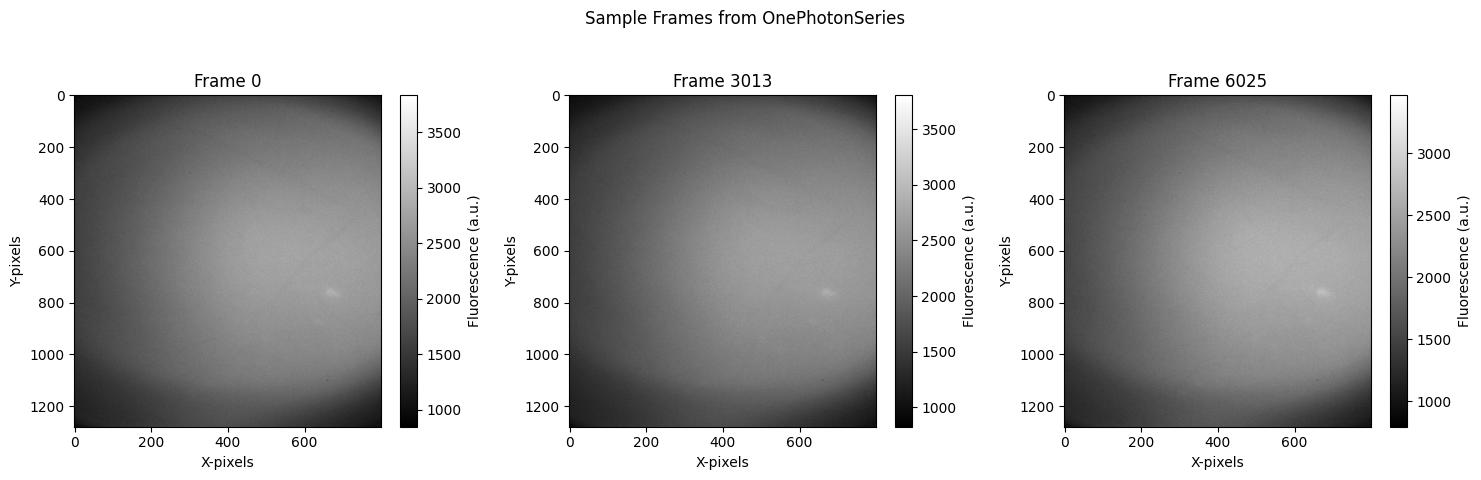

In [4]:
one_photon_series = nwbfile.acquisition.get("OnePhotonSeries")

if one_photon_series:
    print(f"OnePhotonSeries data shape: {one_photon_series.data.shape}")
    print(f"OnePhotonSeries data dtype: {one_photon_series.data.dtype}")

    # Load a few frames. Let's pick 3 frames spread out in time.
    num_frames_total = one_photon_series.data.shape[0]
    frame_indices_to_load = [0, num_frames_total // 2, num_frames_total - 1]

    if num_frames_total > 0:
        fig, axes = plt.subplots(1, len(frame_indices_to_load), figsize=(15, 5))
        if len(frame_indices_to_load) == 1: # Ensure axes is always an array
             axes = [axes]
        fig.suptitle("Sample Frames from OnePhotonSeries")
        for i, frame_idx in enumerate(frame_indices_to_load):
            # Accessing a single frame
            frame_data = one_photon_series.data[frame_idx, :, :]
            ax = axes[i]
            im = ax.imshow(frame_data, cmap='gray', aspect='auto')
            ax.set_title(f"Frame {frame_idx}")
            ax.set_xlabel("X-pixels")
            ax.set_ylabel("Y-pixels")
            plt.colorbar(im, ax=ax, label="Fluorescence (a.u.)")
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle
        plt.show()
    else:
        print("OnePhotonSeries data is empty or could not be loaded.")
else:
    print("OnePhotonSeries not found in acquisition data.")

The plots above show three sample frames from the raw calcium imaging video. These images represent the fluorescence intensity across the imaged field of view at different time points.

### 2. ROI Fluorescence Traces

Next, we'll visualize the fluorescence traces for the detected Regions of Interest (ROIs). These traces show how the fluorescence of each cell changes over time.

ROI Response Series data shape: (6026, 6)


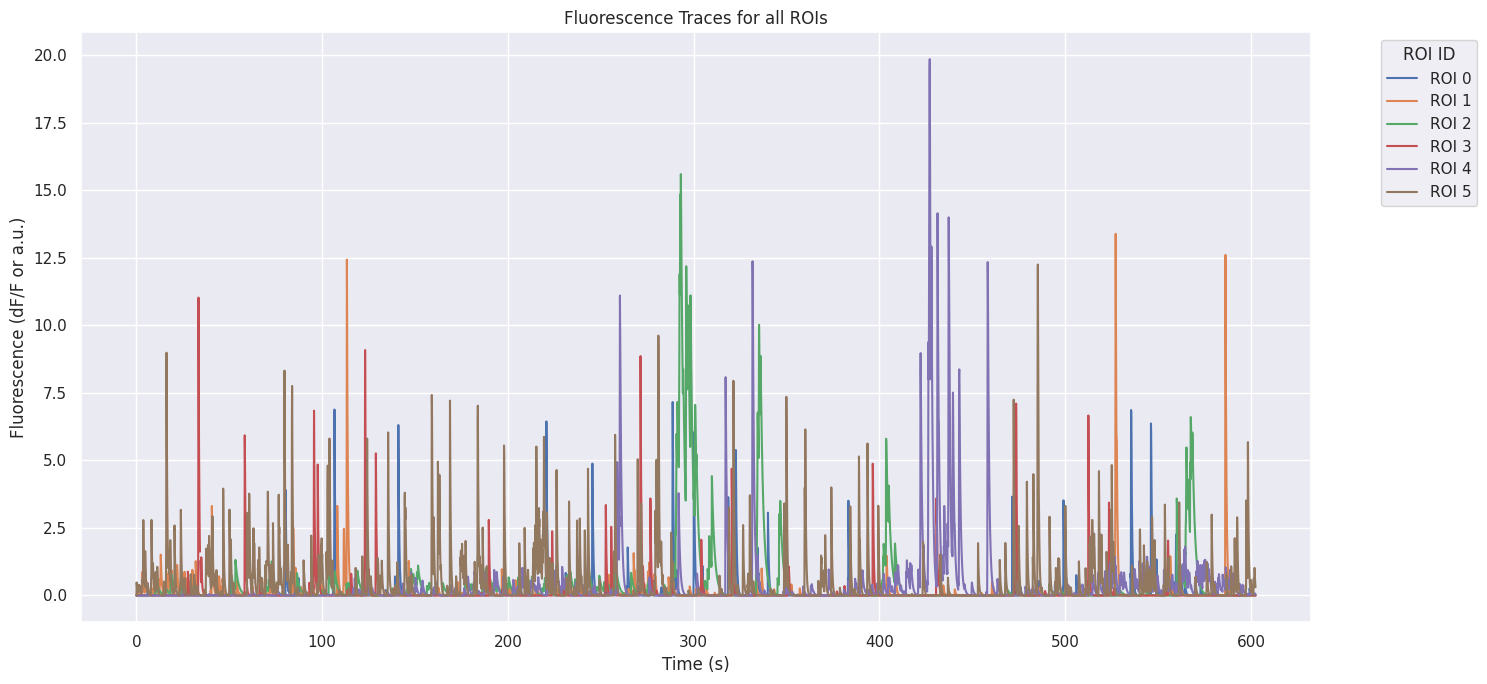

In [5]:
# Set seaborn theme for better aesthetics in time series plots
sns.set_theme()

fluorescence_module = nwbfile.processing.get("ophys")
if fluorescence_module:
    roi_response_series = fluorescence_module.data_interfaces.get("Fluorescence").roi_response_series.get("RoiResponseSeries")
    if roi_response_series:
        print(f"ROI Response Series data shape: {roi_response_series.data.shape}") # (time, num_rois)
        num_rois = roi_response_series.data.shape[1]
        # Load all fluorescence data for all ROIs
        # For N=6 ROIs and T=6026 timepoints, this should be manageable.
        fluorescence_data = roi_response_series.data[:] # Loads all data into a numpy array

        # Create timestamps for the fluorescence data
        # The rate is samples per second. Timestamps are in seconds.
        num_samples = fluorescence_data.shape[0]
        sampling_rate = roi_response_series.rate
        timestamps = np.arange(num_samples) / sampling_rate

        # Get ROI IDs
        # The actual IDs are stored in the 'id' field of the PlaneSegmentation table linked by 'rois'
        plane_segmentation_table = roi_response_series.rois.table
        roi_ids = plane_segmentation_table.id[:]


        plt.figure(figsize=(15, 7))
        for i in range(num_rois):
            plt.plot(timestamps, fluorescence_data[:, i], label=f"ROI {roi_ids[i]}")

        plt.title("Fluorescence Traces for all ROIs")
        plt.xlabel("Time (s)")
        plt.ylabel("Fluorescence (dF/F or a.u.)")
        plt.legend(title="ROI ID", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("RoiResponseSeries not found in ophys processing module.")
else:
    print("Ophys processing module not found.")

The plot above displays the fluorescence traces for the 6 ROIs identified in this NWB file. Each line represents the change in fluorescence intensity for a specific ROI over the duration of the recording. These traces are often used to infer neural activity.

### 3. ROI Image Masks (Spatial Footprints)

We can also visualize the spatial footprints (image masks) of these ROIs. These masks show the shape and location of each detected cell in the imaging field.

In [6]:
# Revert to default matplotlib style for image plots if seaborn was set
plt.style.use('default') # Revert to default style to avoid seaborn affecting imshow

if fluorescence_module: # Assuming fluorescence_module is already defined and checked
    image_segmentation = fluorescence_module.data_interfaces.get("ImageSegmentation")
    if image_segmentation:
        plane_segmentation = image_segmentation.plane_segmentations.get("PlaneSegmentation")
        if plane_segmentation:
            print(f"Number of ROIs in PlaneSegmentation: {len(plane_segmentation.id)}")
            image_masks = plane_segmentation["image_mask"][:] # This loads all image masks

            # Assuming all masks are for the same imaging plane and have the same dimensions
            # The shape of an individual mask is (height, width)
            # We need to find the dimensions of imaging plane.
            # OnePhotonSeries.data shape is (frames, height, width)
            if one_photon_series:
                height, width = one_photon_series.data.shape[1], one_photon_series.data.shape[2]

                # Create an empty array to store the combined mask image
                combined_masks_image = np.zeros((height, width), dtype=float)

                for i in range(len(image_masks)):
                    mask = image_masks[i]
                    # image_mask values range from 0 to 1, representing the weight of the pixel in the ROI.
                    # We can sum them up, or take the max for visualization.
                    # Using np.maximum to overlay masks. If masks overlap, the max value will be shown.
                    # This is a simple way to visualize.
                    # Ensure the mask is correctly shaped. Sometimes masks can be sparse.
                    # For dense masks (height, width):
                    if mask.ndim == 2 and mask.shape[0] == height and mask.shape[1] == width:
                         combined_masks_image = np.maximum(combined_masks_image, mask * (i + 1)) # Multiply by (i+1) to distinguish ROIs if they overlap
                    else:
                        # Handle potentially sparse masks or masks that are not 2D arrays of (height, width)
                        # This example assumes dense masks. If sparse, pynwb stores them differently (e.g., as pixel_mask or voxel_mask).
                        # The 'image_mask' here is expected to be a 2D array.
                        # If it's (num_pixels, 3) with (x, y, weight), different plotting is needed.
                        # Based on pynwb, image_mask is typically a 2D array.
                        print(f"Warning: ROI {plane_segmentation.id[i]} mask has unexpected shape {mask.shape} or type.")


                if np.any(combined_masks_image > 0): # Check if any mask was added
                    plt.figure(figsize=(8, 6))
                    plt.imshow(combined_masks_image, cmap='viridis', aspect='auto', interpolation='nearest') # 'viridis' or 'jet' can be good for distinct colors
                    plt.title("Combined Image Masks of ROIs")
                    plt.xlabel("X-pixels")
                    plt.ylabel("Y-pixels")
                    plt.colorbar(label="ROI identifier (scaled intensity)")
                    plt.show()

                    # Alternatively, plot each mask separately
                    num_rois_masks = len(image_masks)
                    if num_rois_masks > 0:
                        cols = 3
                        rows = int(np.ceil(num_rois_masks / cols))
                        fig, axes = plt.subplots(rows, cols, figsize=(3 * cols, 3 * rows))
                        axes = axes.flatten() # Flatten to 1D array for easy iteration
                        fig.suptitle("Individual ROI Image Masks")
                        for i in range(num_rois_masks):
                            ax = axes[i]
                            mask_data = image_masks[i]
                            if mask_data.ndim == 2: # Ensure it's a 2D mask
                                im = ax.imshow(mask_data, cmap='gray', aspect='auto', vmin=0, vmax=np.max(mask_data) if np.max(mask_data) > 0 else 1)
                                ax.set_title(f"ROI ID: {plane_segmentation.id[i]}")
                                ax.set_xticks([])
                                ax.set_yticks([])
                                # plt.colorbar(im, ax=ax) # Optional: colorbar for each
                            else:
                                ax.text(0.5, 0.5, 'Invalid mask shape', ha='center', va='center')
                                ax.set_title(f"ROI ID: {plane_segmentation.id[i]} (Error)")


                        # Hide any unused subplots
                        for j in range(num_rois_masks, len(axes)):
                            fig.delaxes(axes[j])

                        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
                        plt.show()

                else:
                    print("No valid ROI masks were processed for combined visualization.")
            else:
                print("Could not determine imaging dimensions from OnePhotonSeries to plot masks.")
        else:
            print("PlaneSegmentation not found in ImageSegmentation.")
    else:
        print("ImageSegmentation not found in ophys processing module.")

Number of ROIs in PlaneSegmentation: 6


No valid ROI masks were processed for combined visualization.


The first image above shows all ROI masks overlaid on a single plot. The subsequent plots show each individual ROI mask. These masks represent the spatial footprint of each neuron or component identified during the segmentation process.

### 4. Event Amplitudes

This NWB file also contains `EventAmplitude` data, which typically represents the size or strength of detected neural events (e.g., calcium transients) for each ROI.

Event Amplitude data shape: (6026, 6)


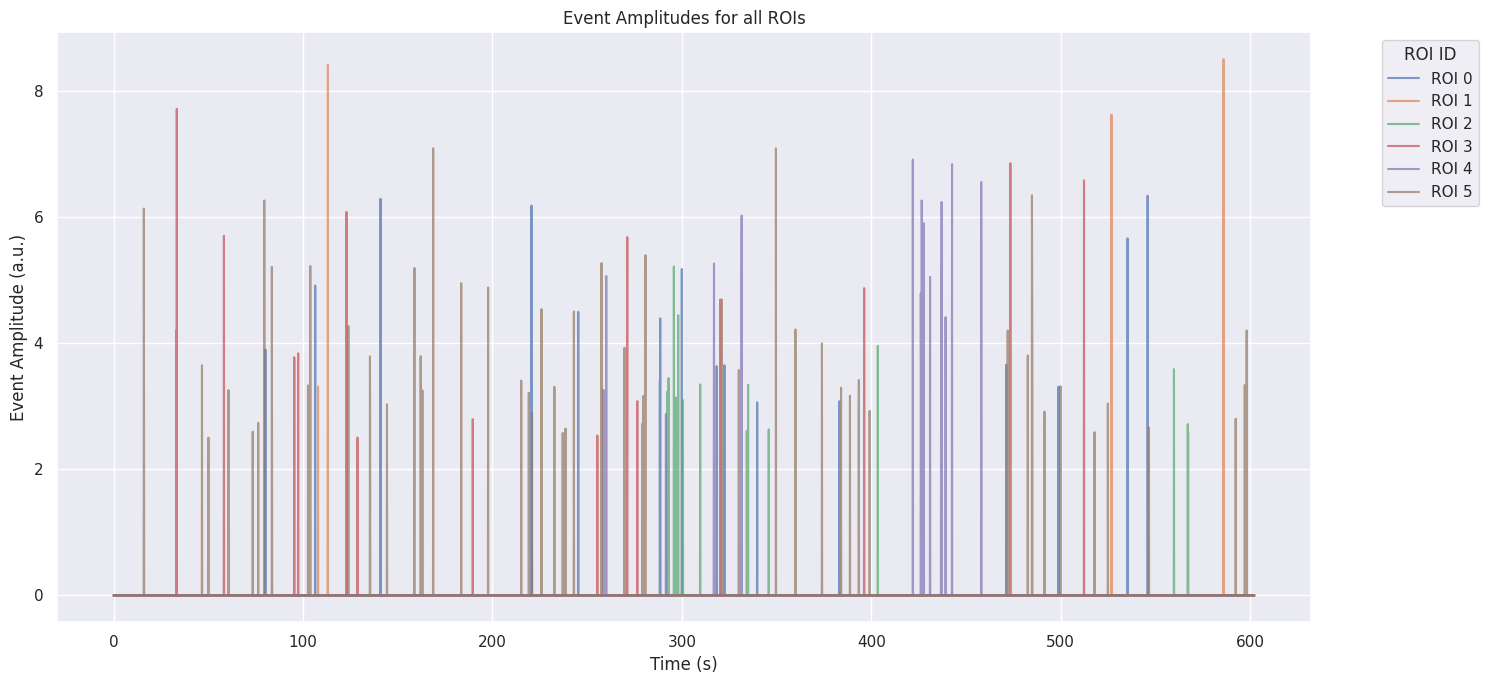

In [7]:
sns.set_theme() # Re-apply seaborn theme if it was reset

if fluorescence_module: # Assuming fluorescence_module is already defined and checked
    event_amplitude_series = fluorescence_module.data_interfaces.get("EventAmplitude")
    if event_amplitude_series:
        print(f"Event Amplitude data shape: {event_amplitude_series.data.shape}") # (time, num_rois)
        num_rois_events = event_amplitude_series.data.shape[1]

        event_data = event_amplitude_series.data[:] # Loads all data

        # Create timestamps for the event data
        num_samples_events = event_data.shape[0]
        sampling_rate_events = event_amplitude_series.rate
        timestamps_events = np.arange(num_samples_events) / sampling_rate_events

        # Get ROI IDs (same as for fluorescence)
        plane_segmentation_table_events = event_amplitude_series.rois.table
        roi_ids_events = plane_segmentation_table_events.id[:]


        plt.figure(figsize=(15, 7))
        for i in range(num_rois_events):
            plt.plot(timestamps_events, event_data[:, i], label=f"ROI {roi_ids_events[i]}", alpha=0.7)

        plt.title("Event Amplitudes for all ROIs")
        plt.xlabel("Time (s)")
        plt.ylabel("Event Amplitude (a.u.)")
        plt.legend(title="ROI ID", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("EventAmplitude series not found in ophys processing module.")
else:
    print("Ophys processing module not found (for EventAmplitude).")

The plot above shows the detected event amplitudes for each ROI over time. Non-zero values typically indicate the occurrence and magnitude of a neural event for the corresponding ROI.

## Summary of Findings and Future Directions

This notebook demonstrated how to:
1. Access and understand metadata for Dandiset 001174.
2. Load a specific NWB file (`sub-F/sub-F_ses-20240213T110430_ophys.nwb`) from the Dandiset.
3. Explore the structure and basic metadata of the NWB file.
4. Visualize key data types:
    - Raw calcium imaging frames from `OnePhotonSeries`.
    - Fluorescence traces for segmented ROIs from `RoiResponseSeries`.
    - Spatial image masks of ROIs from `PlaneSegmentation`.
    - Event amplitudes from `EventAmplitude` series.

The visualizations provide a glimpse into the rich optical physiology data available in this Dandiset. We observed calcium activity traces and spatial footprints for a small number of ROIs in one recording session for subject 'F'.

**Possible Future Directions for Analysis:**

*   **Detailed Event Analysis:** Investigate the properties of detected neural events (e.g., frequency, duration, relationship to behavior if available in other files/metadata).
*   **Cross-ROI Correlations:** Analyze correlations in activity between different ROIs to understand functional connectivity.
*   **Comparison Across Sessions/Subjects:** Extend this analysis to other NWB files in the Dandiset to compare neural activity patterns across different experimental sessions, conditions (e.g., rest vs. task), or subjects. Note that this Dandiset primarily focuses on imaging during spontaneous conditions or arm reaching tasks.
*   **Relating to Behavior:** If behavioral data is available and synchronized, one could explore how neural activity in SMA and M1 relates to specific aspects of the reaching task. (This notebook did not explore behavioral data, which might be in other NWB files or require further metadata exploration).
*   **Advanced Visualization:** Create more sophisticated visualizations, such as plotting ROI activity on top of the mean imaging frame, or creating movies of calcium activity.
*   **Exploring other data types:** The Dandiset description mentions tracking activity across conditions and examining sequential activation patterns. This would require deeper analysis of the data, potentially across multiple files or by leveraging more detailed metadata if present within the NWB files.

This concludes the exploratory notebook for Dandiset 001174.
Use the `io.close()` method to close the NWB file if you are done with it,
although in Jupyter notebooks, it's often implicitly handled or left open for further interaction.
For scripts, explicit closing is more critical.
`io.close()`

In [8]:
# It's good practice to close the HDF5 file object associated with pynwb.NWBHDF5IO
#  and the remfile object when done.
# In a script, this would be important. In a notebook, it's less critical for immediate crashes
# but still good for resource management if the kernel is kept running for a long time.
try:
    if 'io' in locals() and io is not None:
        io.close()
        print("NWB IO closed.")
    if 'h5_nwb_file' in locals() and h5_nwb_file is not None and h5_nwb_file.id.valid: # Check if file is open
        h5_nwb_file.close()
        print("HDF5 file closed.")
    if 'remote_nwb_file' in locals() and remote_nwb_file is not None:
        remote_nwb_file.close() # remfile also has a close method
        print("Remote file object closed.")
except Exception as e:
    print(f"Error during cleanup: {e}")

NWB IO closed.
Remote file object closed.
